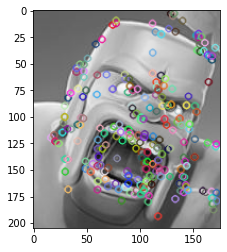

In [2]:
#Keypoint Descriptor:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
queryPath = r'JPG/JPG_GRIS/'
trainPath = r'logos_factures/'

# read image
img1 = cv.imread(queryPath+'barbare.jpg')  
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

#keypoints
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1);

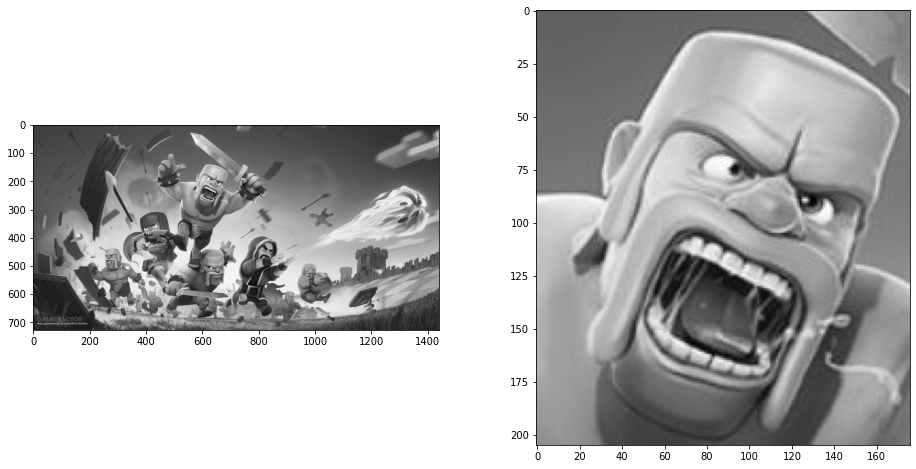

L'image 1 comporte 3171 keypoints.
L'image 2 comporte 259 keypoints.


In [3]:
#Images used in this alogrithm:
#******************************
# reading images:
img1 = cv.imread(queryPath+'clash.jpg')  
img2 = cv.imread(queryPath+'barbare.jpg') 

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

#sift:
sift = cv.SIFT_create()

#Displaying the 2 images: 
figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
plt.show();


#Determine the keypoints and print the total number of keypoints found in each image:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

"""
#Drawing keypoint (optional): not working
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)


img_1 = cv.drawKeypoints(gray1,keypoints_1,img1)
img_2 = cv.drawKeypoints(gray2,keypoints_2,img2)
figure1, ax1 = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img1)
ax[1].imshow(img2)
plt.show();
"""

print('L\'image 1 comporte '+str(len(keypoints_1)) + ' keypoints.')
print('L\'image 2 comporte '+str(len(keypoints_2)) + ' keypoints.')
#len(keypoints_1), len(keypoints_2)

In [23]:
def KeypointsDetectionSIFT(queryPath, queryImage,trainPath, trainImage):
    # read images
    img1 = cv.imread(queryPath + queryImage)  
    img2 = cv.imread(trainPath + trainImage) 

    img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

    #sift
    sift = cv.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    #feature matching
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    matches = bf.match(descriptors_1,descriptors_2)
    matches = sorted(matches, key = lambda x:x.distance)

    #Drawing Image
    img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
    figure = plt.figure(figsize=(16, 9))
    plt.title('Keypoints detection with SIFT technique'), plt.xticks([]), plt.yticks([])
    plt.imshow(img3),plt.show();

    #Saving image
    img_name = queryImage + '_in_'+trainImage
    img_name = img_name.replace('.jpg','').replace('.png','').replace('JPG/JPG_GRIS/','').replace('logos_factures/', '')
        #creating folder to save image
    os.makedirs('./out/KeypointsDetectionSIFT/' + queryImage + '/', mode = 0o777, exist_ok = True) 
        #saving image
    filename = './out/KeypointsDetectionSIFT/' + img_name + '.jpg'
    cv.imwrite(filename,img3)

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#Brute-Force Matching with SIFT Descriptors and Ratio Test

def bruteForceMatchingSIFT(queryPath, queryImage, trainPath, trainImage ):
    #Reading images
    img1 = cv.imread(queryPath + queryImage,cv.IMREAD_GRAYSCALE)          # queryImage (logo)
    img2 = cv.imread(trainPath + trainImage,cv.IMREAD_GRAYSCALE)          # trainImage (image with logo in it)

    #Initiate SIFT detector
    sift = cv.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # BFMatcher with default params
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)

    # Apply ratio test
    good = []
    distanceParameter = 0.3 #initially at .75 ; test needed to adjust this parameter
    for m,n in matches:
        if m.distance < distanceParameter*n.distance:
            good.append([m])

    #ratio of matching keypoints
    ratio = round((len(good)/len(kp2)), 2)
    print(str(len(good)) + " keypoints are matching on " + str(len(kp2))+" keypoints (ratio = " + str(ratio)+")")
    #Drawing matches on images
        # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#▬▬uncomment▬to▬display▬images▬▬    
    """
    figure = plt.figure(figsize=(16, 9))
    plt.title('Brute-Force Matching with SIFT Descriptors and Ratio Test : '+queryImage+" in "+trainImage), plt.xticks([]), plt.yticks([])
    plt.imshow(img3),plt.show();
    """
    #Saving image
    img_name = queryImage + '_in_'+trainImage
    img_name = img_name.replace('.jpg','').replace('.png','').replace('JPG/JPG_GRIS/','').replace('logos_factures/', '')
          #creating the folder to save the image
    os.makedirs('./out/bruteForceMatchingSIFT/' + queryImage + '/', mode = 0o777, exist_ok = True) 
          #saving image
    filename = './out/bruteForceMatchingSIFT/' + queryImage + '/' +str(ratio)+'_' + img_name + '.jpg'
    cv.imwrite(filename,img3)
    
    return ratio

Keypoints Detection with SIFT


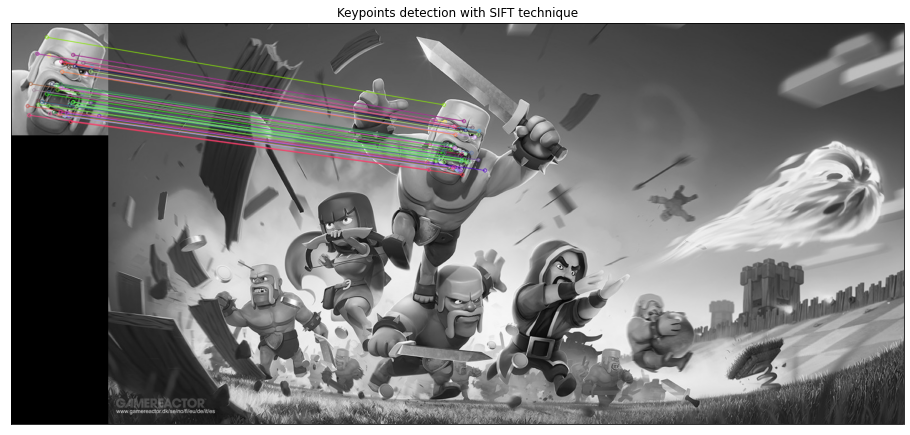

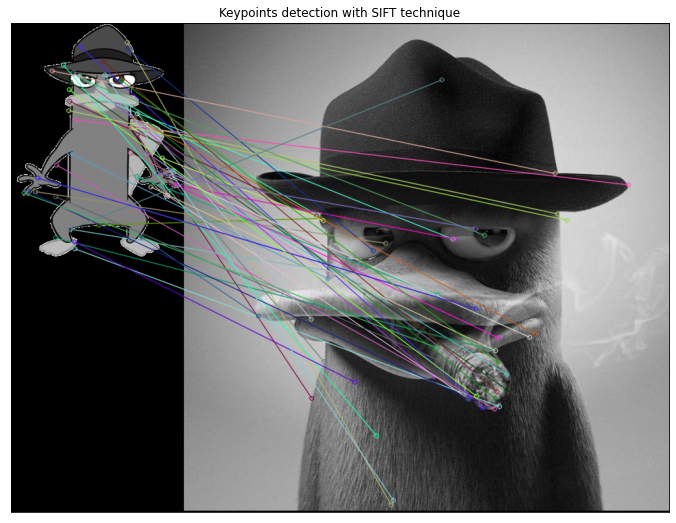

	BruteForce Matching SIFT
65 keypoints are matching on 3170 keypoints (ratio = 0.25)


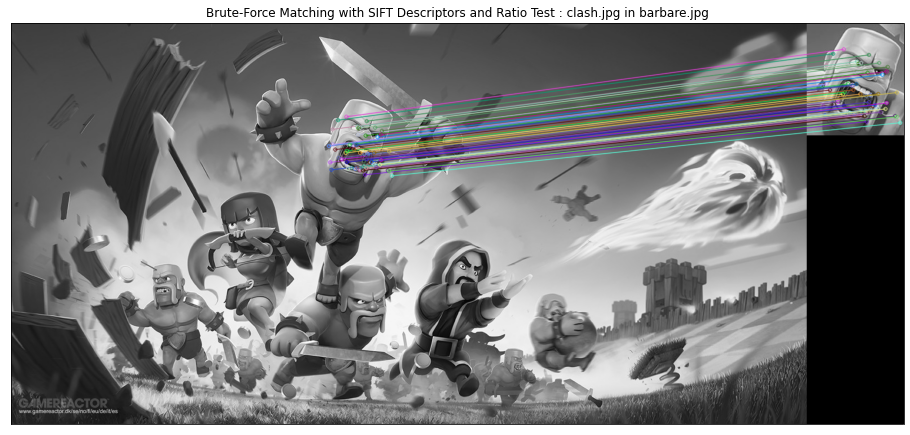

0 keypoints are matching on 861 keypoints (ratio = 0.0)


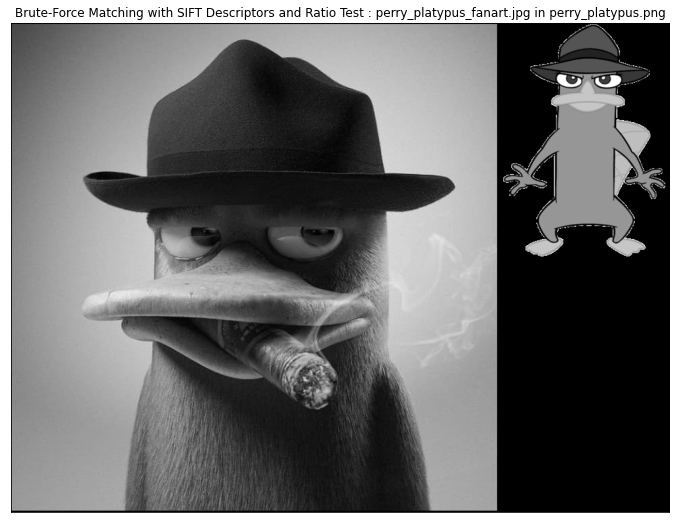

27 keypoints are matching on 40708 keypoints (ratio = 0.52)


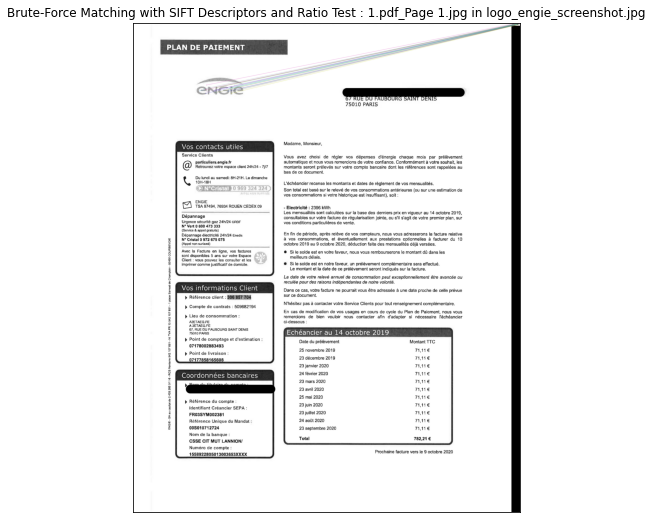

                 Image Name ratio
0          barbare_in_clash  0.25
1      perry_in_perryfanart   0.0
2  engie_in_engiescreenshot  0.52


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\1229380188.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\1229380188.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data, ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\1229380188.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data, ignore_index=True)


''

In [86]:
import os
print('Keypoints Detection with SIFT')
KeypointsDetectionSIFT(queryPath,'barbare.jpg', queryPath, 'clash.jpg')
KeypointsDetectionSIFT(queryPath,'perry_platypus.png', queryPath, 'perry_platypus_fanart.jpg')

print('\tBruteForce Matching SIFT')
ratio1 = bruteForceMatchingSIFT(queryPath, 'clash.jpg', queryPath, 'barbare.jpg')
ratio2 = bruteForceMatchingSIFT(queryPath, 'perry_platypus_fanart.jpg', queryPath, 'perry_platypus.png')
ratio3 = bruteForceMatchingSIFT(queryPath, '1.pdf_Page 1.jpg', trainPath, 'logo_engie_screenshot.jpg')


#as a dataframe
import pandas as pd
df_ratio_bruteforce = pd.DataFrame(columns=['Image Name','ratio'])
# The dataframe to append
data = {
    'Image Name':'barbare_in_clash',
    'ratio':ratio1
}
df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)

# The dataframe to append
data = {
    'Image Name':'perry_in_perryfanart',
    'ratio':ratio2
}
df_ratio_bruteforce = df_ratio_bruteforce.append(data, ignore_index=True)

data = {
    'Image Name':'engie_in_engiescreenshot',
    'ratio':ratio3
}
df_ratio_bruteforce = df_ratio_bruteforce.append(data, ignore_index=True)

df_ratio_bruteforce.head(5)

import fpdf
##storing results in output.PDF:
pdf = fpdf.FPDF(format='letter')
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.write(5,"\tYolène Moysan\tAlexis Guillotin\tClément Marie-Brisson\n\n\n")
pdf.set_font("Arial", size=20)
pdf.write(5,"Projet Python : Finding Objects In Images\n\n\n")
pdf.set_font("Arial", size=12)
print(df_ratio_bruteforce[:5])
pdf.write(5,'0')
pdf.ln()
pdf.output("out/output.pdf")


In [94]:
import os
import pandas as pd
import fpdf


def main():

    queryImagesList = os.listdir(queryPath) #query images list
    trainImagesList = os.listdir(trainPath) #logos images list
    
    df_ratio_bruteforce = pd.DataFrame(columns=['Image Name','ratio'])
    
    cpt=0
    for queryImage in queryImagesList:
        print(cpt," sur ", len(queryImagesList))
        for trainImage in trainImagesList:
            #▬▬Algorithm detection
            print('KeypointsDetectionSIFT')
            KeypointsDetectionSIFT(queryPath, queryImage, trainPath, trainImage)
            print('bruteForceMatchingSIFT : ' + queryImage + '_in_'+trainImage)
            ratio = bruteForceMatchingSIFT(queryPath, queryImage, trainPath, trainImage)
            

            #▬▬The dataframe to append
            data = {
                'Image Name':queryImage+'_in_'+trainImage,
                'ratio':ratio }
            df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
        cpt =cpt + 1
    """
    ##storing results in output.PDF:
    pdf = fpdf.FPDF(format='letter')
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.write(5,"\tYolène Moysan\tAlexis Guillotin\tClément Marie-Brisson\n\n\n")
    pdf.set_font("Arial", size=20)
    pdf.write(5,"Projet Python : Finding Objects In Images\n\n\n")
    pdf.set_font("Arial", size=12)

    pdf.write(5,df_ratio_bruteforce)
    pdf.ln()
    pdf.output("out/output.pdf")
    """
    return df_ratio_bruteforce
df = main()

0  sur  42
bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
5 keypoints are matching on 453 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
4 keypoints are matching on 176 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
27 keypoints are matching on 52 keypoints (ratio = 0.52)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
1 keypoints are matching on 28 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_orange.png
3 keypoints are matching on 81 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
2 keypoints are matching on 7 keypoints (ratio = 0.29)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 1.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
1 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
27 keypoints are matching on 176 keypoints (ratio = 0.15)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_enercorp.png
5 keypoints are matching on 261 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
1 keypoints are matching on 28 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_orange.png
8 keypoints are matching on 81 keypoints (ratio = 0.1)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
2 keypoints are matching on 7 keypoints (ratio = 0.29)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 13.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_enercorp.png
3 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
50 keypoints are matching on 135 keypoints (ratio = 0.37)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_enercorp.png
3 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
50 keypoints are matching on 135 keypoints (ratio = 0.37)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_enercorp.png
3 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_free_screenshot.JPG
50 keypoints are matching on 135 keypoints (ratio = 0.37)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 14.pdf_Page 3.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
112 keypoints are matching on 176 keypoints (ratio = 0.64)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_free.png
1 keypoints are matching on 37 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_orange.png
1 keypoints are matching on 81 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
112 keypoints are matching on 176 keypoints (ratio = 0.64)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_free.png
1 keypoints are matching on 37 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_orange.png
1 keypoints are matching on 81 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 15.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_EDF.png
1 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
1 keypoints are matching on 28 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_EDF.png
1 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
1 keypoints are matching on 28 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 17.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 3.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 18.pdf_Page 4.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
1 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_enercorp.png
2 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 2.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
1 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
1 keypoints are matching on 28 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_orange.png
8 keypoints are matching on 81 keypoints (ratio = 0.1)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
7 keypoints are matching on 16 keypoints (ratio = 0.44)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
1 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
1 keypoints are matching on 28 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_orange.png
8 keypoints are matching on 81 keypoints (ratio = 0.1)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
7 keypoints are matching on 16 keypoints (ratio = 0.44)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_EDF_screenshot.PNG
1 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_LCL_screenshot.JPG
1 keypoints are matching on 28 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_orange.png
8 keypoints are matching on 81 keypoints (ratio = 0.1)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_orange_screenshot.JPG
7 keypoints are matching on 16 keypoints (ratio = 0.44)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 24.pdf_Page 3.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
1 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
11 keypoints are matching on 176 keypoints (ratio = 0.06)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_enercorp.png
2 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_orange.png
2 keypoints are matching on 81 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
2 keypoints are matching on 7 keypoints (ratio = 0.29)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 3.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
1 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
1 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 32.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
11 keypoints are matching on 176 keypoints (ratio = 0.06)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
11 keypoints are matching on 176 keypoints (ratio = 0.06)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_EDF_screenshot.PNG
11 keypoints are matching on 176 keypoints (ratio = 0.06)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 4.pdf_Page 3.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_EDF.png
1 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
7 keypoints are matching on 176 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_enercorp.png
4 keypoints are matching on 261 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_orange.png
1 keypoints are matching on 81 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 5.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
26 keypoints are matching on 63 keypoints (ratio = 0.41)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_enercorp.png
2 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
26 keypoints are matching on 63 keypoints (ratio = 0.41)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_enercorp.png
2 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_bouygues_screenshot.JPG
26 keypoints are matching on 63 keypoints (ratio = 0.41)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_enercorp.png
2 keypoints are matching on 261 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : 50.pdf_Page 3.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : barbare.JPG_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_EDF.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 448 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)
bruteForceMatchingSIFT : barbare.JPG_in_logo_enercorp.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 261 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_engie.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 391 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_lcl.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

0 keypoints are matching on 103 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_sfr.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

0 keypoints are matching on 42 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : barbare.JPG_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)
0  sur  42
bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


2 keypoints are matching on 63 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
5 keypoints are matching on 176 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_1.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
2 keypoints are matching on 63 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
3 keypoints are matching on 176 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_enercorp.png
1 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_2.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
1 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_enercorp.png
11 keypoints are matching on 261 keypoints (ratio = 0.04)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_orange.png
1 keypoints are matching on 81 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
17 keypoints are matching on 7 keypoints (ratio = 2.43)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : bulletin_paie_3.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : clash.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_EDF.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 448 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_EDF_screenshot.PNG


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 176 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_enercorp.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 261 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_engie.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 391 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_engie_screenshot.JPG


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 52 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : clash.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : clash.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : clash.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : clash.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : clash.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : clash.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : clash.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)
0  sur  42
bruteForceMatchingSIFT : perry_platypus.png_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_bouygues_telecom.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 453 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_EDF.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 448 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_enercorp.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 261 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_engie.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 391 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

bruteForceMatchingSIFT : perry_platypus.png_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : perry_platypus.png_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus.png_in_logo_societe_generale.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 32 keypoints (ratio = 0.0)
0  sur  42
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_bouygues_screenshot.JPG
1 keypoints are matching on 63 keypoints (ratio = 0.02)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_bouygues_telecom.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 453 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_EDF.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 448 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_EDF_screenshot.PNG


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 176 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_engie.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 391 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_free_screenshot.JPG


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 135 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_LCL_screenshot.JPG


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 28 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)
bruteForceMatchingSIFT : perry_platypus_fanart.jpg_in_logo_societe_generale.png


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)
C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 32 keypoints (ratio = 0.0)
0  sur  42
bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_lcl.png
2 keypoints are matching on 103 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
5 keypoints are matching on 28 keypoints (ratio = 0.18)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_lcl.png
2 keypoints are matching on 103 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
5 keypoints are matching on 28 keypoints (ratio = 0.18)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_EDF.png
0 keypoints are matching on 448 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_EDF_screenshot.PNG
0 keypoints are matching on 176 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_enercorp.png
0 keypoints are matching on 261 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_lcl.png
2 keypoints are matching on 103 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_LCL_screenshot.JPG
5 keypoints are matching on 28 keypoints (ratio = 0.18)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_sfr.png
0 keypoints are matching on 42 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_SocieteGenerale_screenshot.JPG
0 keypoints are matching on 7 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_1.pdf_Page 3.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_EDF.png
3 keypoints are matching on 448 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_enercorp.png
7 keypoints are matching on 261 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_sfr.png
1 keypoints are matching on 42 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_SocieteGenerale_screenshot.JPG
4 keypoints are matching on 7 keypoints (ratio = 0.57)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 1.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_EDF.png
3 keypoints are matching on 448 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_enercorp.png
7 keypoints are matching on 261 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_sfr.png
1 keypoints are matching on 42 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_SocieteGenerale_screenshot.JPG
4 keypoints are matching on 7 keypoints (ratio = 0.57)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 2.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_EDF.png
3 keypoints are matching on 448 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_enercorp.png
7 keypoints are matching on 261 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_sfr.png
1 keypoints are matching on 42 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_SocieteGenerale_screenshot.JPG
4 keypoints are matching on 7 keypoints (ratio = 0.57)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 3.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_EDF.png
3 keypoints are matching on 448 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_enercorp.png
7 keypoints are matching on 261 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_sfr.png
1 keypoints are matching on 42 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_SocieteGenerale_screenshot.JPG
4 keypoints are matching on 7 keypoints (ratio = 0.57)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 4.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


0  sur  42
bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_bouygues_screenshot.JPG
0 keypoints are matching on 63 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_bouygues_telecom.png
0 keypoints are matching on 453 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_EDF.png
3 keypoints are matching on 448 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_EDF_screenshot.PNG
2 keypoints are matching on 176 keypoints (ratio = 0.01)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_enercorp.png
7 keypoints are matching on 261 keypoints (ratio = 0.03)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_engie.png
0 keypoints are matching on 391 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_engie_screenshot.JPG
0 keypoints are matching on 52 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_free.png
0 keypoints are matching on 37 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_free_screenshot.JPG
0 keypoints are matching on 135 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_lcl.png
0 keypoints are matching on 103 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_LCL_screenshot.JPG
0 keypoints are matching on 28 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_orange.png
0 keypoints are matching on 81 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_orange_screenshot.JPG
0 keypoints are matching on 16 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_sfr.png
1 keypoints are matching on 42 keypoints (ratio = 0.02)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_SocieteGenerale_screenshot.JPG
4 keypoints are matching on 7 keypoints (ratio = 0.57)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


bruteForceMatchingSIFT : releve_compte_2.pdf_Page 5.jpg_in_logo_societe_generale.png
0 keypoints are matching on 32 keypoints (ratio = 0.0)


C:\Users\cmbri\AppData\Local\Temp\ipykernel_3964\2254195672.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratio_bruteforce = df_ratio_bruteforce.append(data,ignore_index=True)


In [97]:
print(df)
df.to_csv('out/SCORES_brutforce_SIFT.csv')

                                            Image Name ratio
0     1.pdf_Page 1.jpg_in_logo_bouygues_screenshot.JPG   0.0
1        1.pdf_Page 1.jpg_in_logo_bouygues_telecom.png  0.01
2                     1.pdf_Page 1.jpg_in_logo_EDF.png   0.0
3          1.pdf_Page 1.jpg_in_logo_EDF_screenshot.PNG  0.02
4                1.pdf_Page 1.jpg_in_logo_enercorp.png   0.0
..                                                 ...   ...
667  releve_compte_2.pdf_Page 5.jpg_in_logo_orange.png   0.0
668  releve_compte_2.pdf_Page 5.jpg_in_logo_orange_...   0.0
669     releve_compte_2.pdf_Page 5.jpg_in_logo_sfr.png  0.02
670  releve_compte_2.pdf_Page 5.jpg_in_logo_Societe...  0.57
671  releve_compte_2.pdf_Page 5.jpg_in_logo_societe...   0.0

[672 rows x 2 columns]


In [98]:
"""
path=r'JPG'


def sift(filename):
    img = cv.imread(filename) # Lire le fichier
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir en diagramme gris
    sift = cv.SIFT.create()
    keyPoint, descriptor = sift.detectAndCompute(img, None) #  Les caractéristiques sont extraites pour obtenir les clés et les descripteurs correspondants （Vecteur caractéristique）
    return img,keyPoint, descriptor

def surf(filename):
    img = cv.imread(filename) # Lire le fichier
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir en diagramme gris
    sift = cv.SURF.create()
    keyPoint, descriptor = sift.detectAndCompute(img, None) #  Les caractéristiques sont extraites pour obtenir les clés et les descripteurs correspondants （Vecteur caractéristique）
    return img, keyPoint, descriptor

def orb(filename):
    img = cv.imread(filename) # Lire le fichier
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir en diagramme gris
    sift = cv.ORB_create()
    keyPoint, descriptor = sift.detectAndCompute(img, None) #  Les caractéristiques sont extraites pour obtenir les clés et les descripteurs correspondants （Vecteur caractéristique）
    return img, keyPoint, descriptor

def compare(filename):
    imgs = []
    keyPoint = []
    descriptor = []
    img, keyPoint_temp, descriptor_temp = sift(filename)
    keyPoint.append(keyPoint_temp)
    descriptor.append(descriptor_temp)
    imgs.append(img)
    img, keyPoint_temp, descriptor_temp = surf(filename)
    keyPoint.append(keyPoint_temp)
    descriptor.append(descriptor_temp)
    imgs.append(img)
    img, keyPoint_temp, descriptor_temp = orb(filename)
    keyPoint.append(keyPoint_temp)
    descriptor.append(descriptor_temp)
    imgs.append(img)
    return imgs, keyPoint, descriptor

def main():
    method = ['sift','surf','orb']
    imgs, kp, des = compare('./pic/doraemon1.jpg')
    for i in range(3):
        img = cv.drawKeypoints(imgs[i], kp[i], None)
        cv.imshow(method[i], img)
        cv.waitKey()
        cv.destroyAllWindows()
    print("sift len of des: %d, size of des: %d" % (len(des[0]), len(des[0][0])))
    print("surf len of des: %d, size of des: %d" % (len(des[1]), len(des[1][0])))
    print("orb len of des: %d, size of des: %d" % (len(des[2]), len(des[2][0])))
    
    
def match(filename1, filename2, method):
    if(method == 'sift'):
        img1, kp1, des1 = sift(filename1)
        img2, kp2, des2 = sift(filename2)
        bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)  # siftDenormTypeIl faut utiliserNORM_L2OuNORM_L1
        matches = bf.match(des1, des2)
        matches = sorted(matches, key=lambda x: x.distance)
        knnMatches = bf.knnMatch(des1, des2, k=1)  # drawMatchesKnn
    if (method == 'surf'):
        img1, kp1, des1 = surf(filename1)
        img2, kp2, des2 = surf(filename2)
        bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)  # surfDenormTypeIl faut utiliserNORM_L2OuNORM_L1
        matches = bf.match(des1, des2)
        matches = sorted(matches, key=lambda x: x.distance)
        knnMatches = bf.knnMatch(des1, des2, k=1)  # drawMatchesKnn
    if(method == 'orb'):
        img1, kp1, des1 = orb(filename1)
        img2, kp2, des2 = orb(filename2)
        bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True) # orbDenormTypeIl faut utiliserNORM_HAMMING
        matches = bf.match(des1, des2)
        matches = sorted(matches, key=lambda x: x.distance)
        knnMatches = bf.knnMatch(des1, des2, k = 1) # drawMatchesKnn
    # Filtration
    for m in matches:
        for n in matches:
            if(m != n and m.distance >= n.distance*0.75):
                matches.remove(m)
                break
    img = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], img2, flags=2)
    cv.imshow("matches", img)
    cv.waitKey()
    cv.destroyAllWindows()
def main():
    method = ['sift','surf','orb']
    for i in range(3):
        match(path+'/factu_byt.pdf_Page 4.jpg', path+'/bytt.png', method[i])
if __name__ == '__main__':
    main()
"""

'\npath=r\'JPG\'\n\n\ndef sift(filename):\n    img = cv.imread(filename) # Lire le fichier\n    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir en diagramme gris\n    sift = cv.SIFT.create()\n    keyPoint, descriptor = sift.detectAndCompute(img, None) #  Les caractéristiques sont extraites pour obtenir les clés et les descripteurs correspondants （Vecteur caractéristique）\n    return img,keyPoint, descriptor\n\ndef surf(filename):\n    img = cv.imread(filename) # Lire le fichier\n    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir en diagramme gris\n    sift = cv.SURF.create()\n    keyPoint, descriptor = sift.detectAndCompute(img, None) #  Les caractéristiques sont extraites pour obtenir les clés et les descripteurs correspondants （Vecteur caractéristique）\n    return img, keyPoint, descriptor\n\ndef orb(filename):\n    img = cv.imread(filename) # Lire le fichier\n    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir en diagramme gris\n    sift = cv.ORB_create()\n    key

In [7]:
import os
ratio1 = bruteForceMatchingSIFT(queryPath, 'mael_page1.jpg', trainPath, 'logo_wifi_first.jpg')

8 keypoints are matching on 18 keypoints (ratio = 0.44)
